# 49 Slicing GemPy Lith Blocks in PyVista with GemGIS

The lith block of a GemPy model can be loaded as a volume into PyVista and be sliced to get geological cross sections. The different slicing options are introduced here. 

<img src="../images/tutorial49_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/49_slicing_gempy_lith_blocks_in_pyvista_with_gemgis/'

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="49_slicing_gempy_lith_blocks_in_pyvista_with_gemgis.zip", dirpath=file_path)

## Loading the lith block

The lith block of a computed GemPy model is loaded using NumPy and reshaped to the original dimensions (resolution) of the model.

In [2]:
import pyvista as pv
import numpy as np

lith_block = np.load(file_path + 'lith_block.npy').reshape(50,50,50)
lith_block[0]

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [3., 3., 3., ..., 2., 2., 1.],
       [3., 3., 3., ..., 2., 2., 2.],
       [3., 3., 3., ..., 2., 2., 2.]])

All values above the topography representing air are assigned NaN values so that they can be hidden from the visualization.

In [3]:
lith_block[lith_block == 1] = np.nan
lith_block[:0]

array([], shape=(0, 50, 50), dtype=float64)

## Wrapping the object

The array can now be wrapped using ``pv.wrap(..)`` to create a volume.

In [4]:
volume = pv.wrap(lith_block)
volume

UniformGrid (0x275e8d23ca0)
  N Cells:	117649
  N Points:	125000
  X Bounds:	0.000e+00, 4.900e+01
  Y Bounds:	0.000e+00, 4.900e+01
  Z Bounds:	0.000e+00, 4.900e+01
  Dimensions:	50, 50, 50
  Spacing:	1.000e+00, 1.000e+00, 1.000e+00
  N Arrays:	1

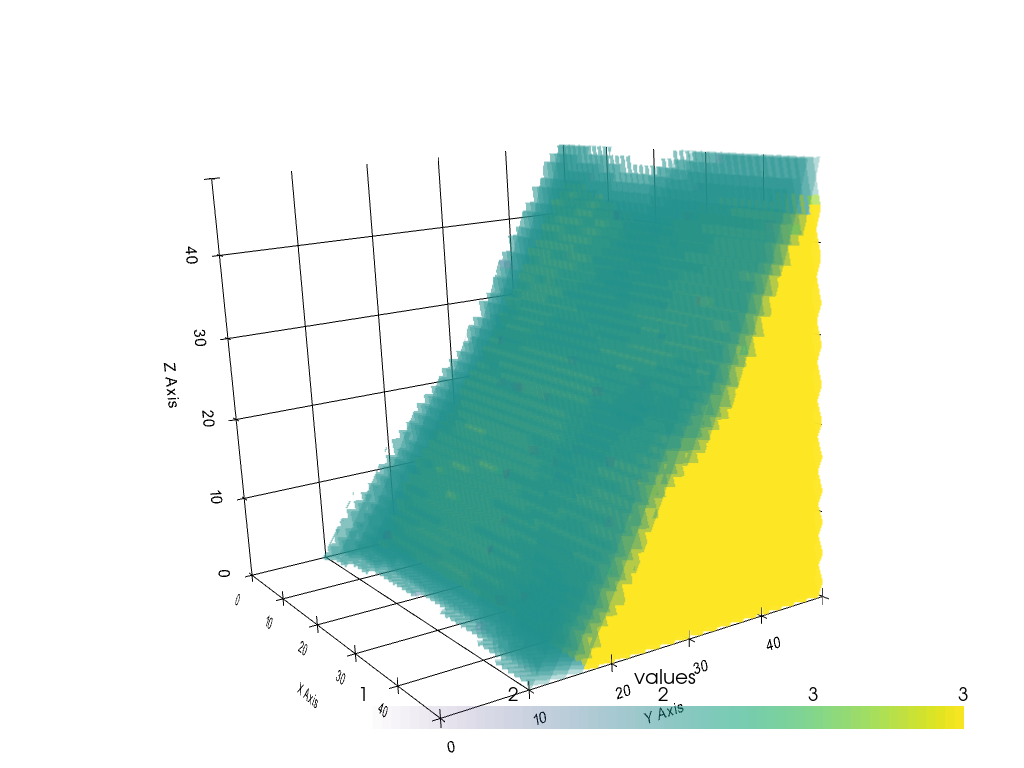

In [5]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)
p.camera_position = [(161.91360339500804, -56.76742646880152, 61.85062200360107), (24.5, 24.5, 24.5), (-0.16718411386271567, 0.1641218812347994, 0.9721694709112653)]

p.add_volume(volume, scalar_bar_args=sargs)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Slicing the volume orthogonally 

When slicing the volume, a multi block object is created where the different blocks represent the different slices.

In [6]:
slices = volume.slice_orthogonal()
slices

MultiBlock (0x275ee300be0)
  N Blocks:	3
  X Bounds:	0.000, 49.000
  Y Bounds:	0.000, 49.000
  Z Bounds:	0.000, 49.000

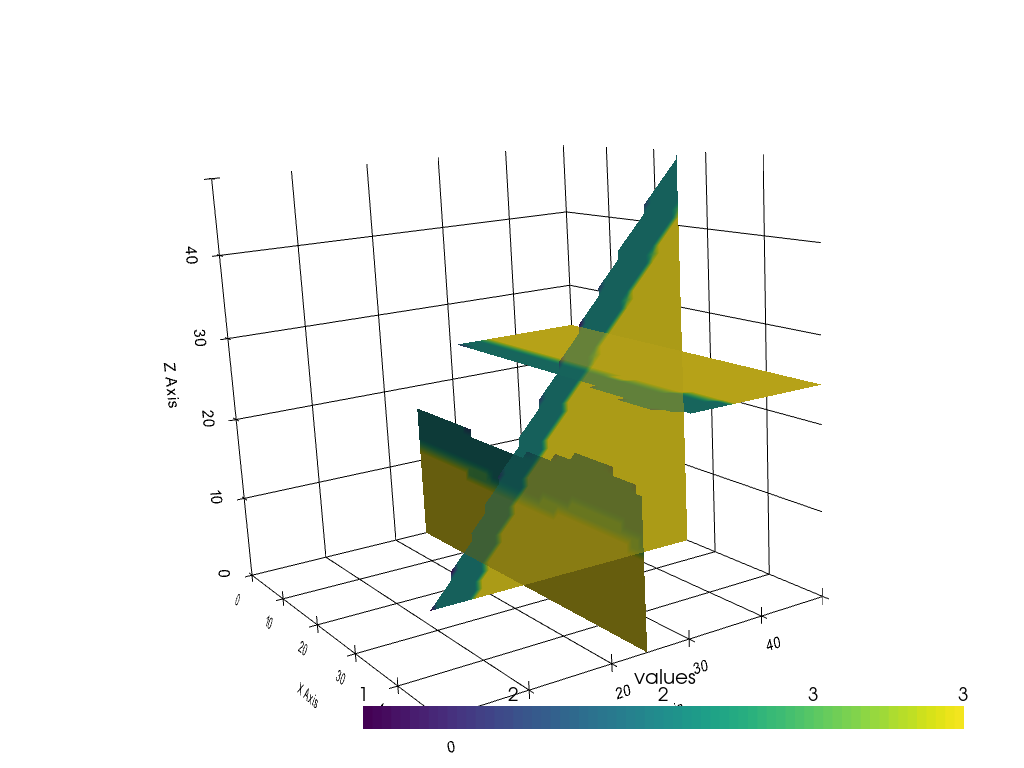

In [7]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)
p.camera_position = [(161.91360339500804, -56.76742646880152, 61.85062200360107), (24.5, 24.5, 24.5), (-0.16718411386271567, 0.1641218812347994, 0.9721694709112653)]

p.add_mesh(slices, scalar_bar_args=sargs, nan_opacity=0)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

In [8]:
slices = volume.slice_orthogonal(x=5, y=20, z=5)
slices

MultiBlock (0x275ee325040)
  N Blocks:	3
  X Bounds:	0.000, 49.000
  Y Bounds:	0.000, 49.000
  Z Bounds:	0.000, 49.000

The orthogonal slices can be easily translated throughout the volume.

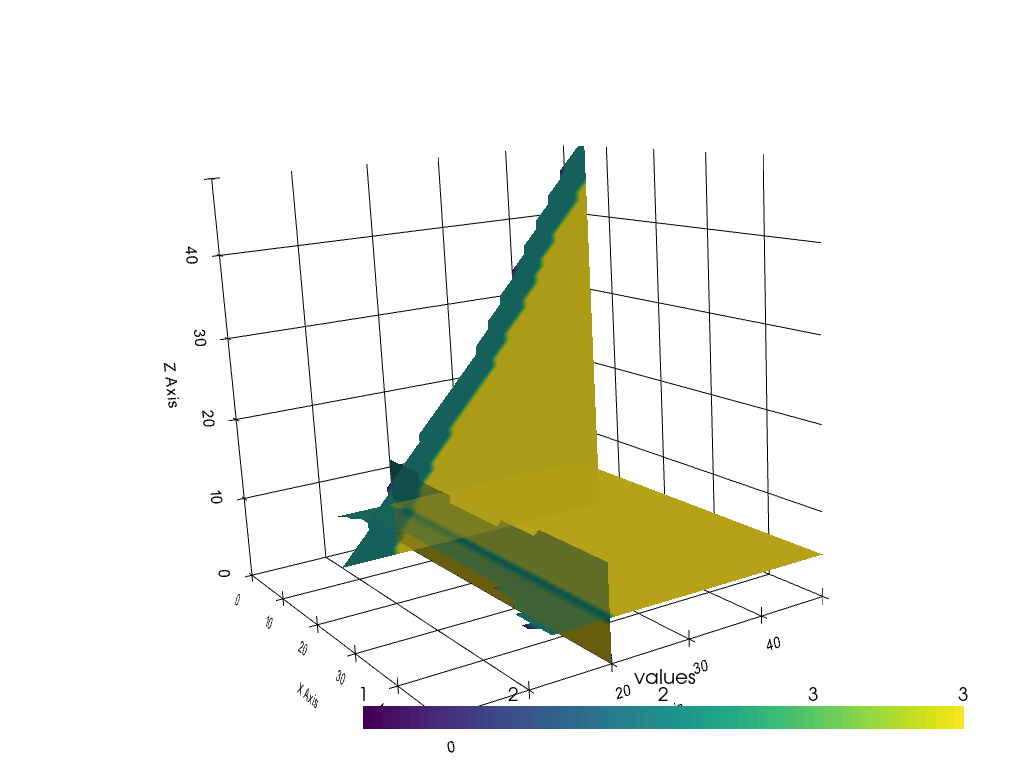

In [9]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)
p.camera_position = [(161.91360339500804, -56.76742646880152, 61.85062200360107), (24.5, 24.5, 24.5), (-0.16718411386271567, 0.1641218812347994, 0.9721694709112653)]

p.add_mesh(slices, scalar_bar_args=sargs, nan_opacity=0)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Adding single slices

Arbitrary single slices can also be extracted. The origin defaults to the center of the mesh.

In [10]:
single_slice1 = volume.slice(normal=[1, 1, 0])
single_slice1

PolyData (0x275ee325ee0)
  N Cells:	2401
  N Points:	2500
  X Bounds:	0.000e+00, 4.900e+01
  Y Bounds:	0.000e+00, 4.900e+01
  Z Bounds:	0.000e+00, 4.900e+01
  N Arrays:	1

In [11]:
single_slice2 = volume.slice(normal=[1, 0, 0])
single_slice2

PolyData (0x275ee325fa0)
  N Cells:	2401
  N Points:	2500
  X Bounds:	2.450e+01, 2.450e+01
  Y Bounds:	0.000e+00, 4.900e+01
  Z Bounds:	0.000e+00, 4.900e+01
  N Arrays:	1

In [12]:
single_slice3 = volume.slice(normal=[0, 1, 0])
single_slice3

PolyData (0x275ea1722e0)
  N Cells:	2401
  N Points:	2500
  X Bounds:	0.000e+00, 4.900e+01
  Y Bounds:	2.450e+01, 2.450e+01
  Z Bounds:	0.000e+00, 4.900e+01
  N Arrays:	1

In [13]:
single_slice4 = volume.slice(normal=[0, 0, 1])
single_slice4

PolyData (0x275ea172700)
  N Cells:	2401
  N Points:	2500
  X Bounds:	0.000e+00, 4.900e+01
  Y Bounds:	0.000e+00, 4.900e+01
  Z Bounds:	2.450e+01, 2.450e+01
  N Arrays:	1

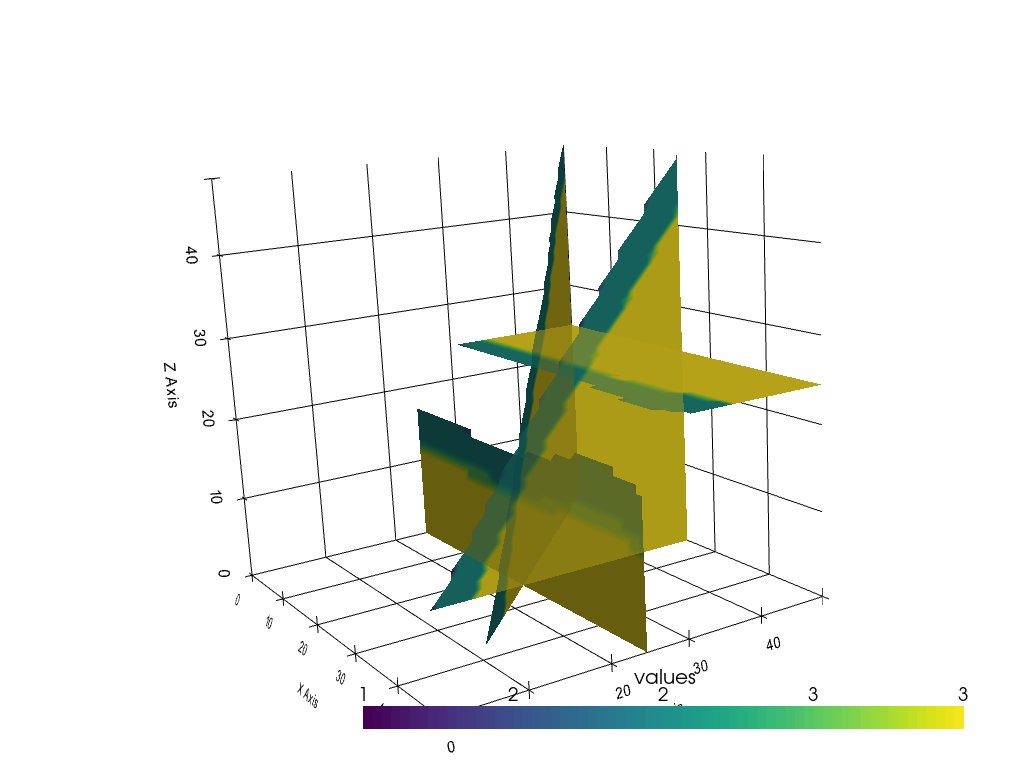

In [14]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)
p.camera_position = [(161.91360339500804, -56.76742646880152, 61.85062200360107), (24.5, 24.5, 24.5), (-0.16718411386271567, 0.1641218812347994, 0.9721694709112653)]

p.add_mesh(single_slice1, scalar_bar_args=sargs, nan_opacity=0)
p.add_mesh(single_slice2, scalar_bar_args=sargs, nan_opacity=0)
p.add_mesh(single_slice3, scalar_bar_args=sargs, nan_opacity=0)
p.add_mesh(single_slice4, scalar_bar_args=sargs, nan_opacity=0)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Slices uniformly accross an axial direction

Adding slicing planes uniformly across an axial direction can also be automated using ``slice_along_axis(..)``.

In [15]:
slices = volume.slice_along_axis(n=7, axis="x")
slices

MultiBlock (0x275ea172460)
  N Blocks:	7
  X Bounds:	0.490, 48.510
  Y Bounds:	0.000, 49.000
  Z Bounds:	0.000, 49.000

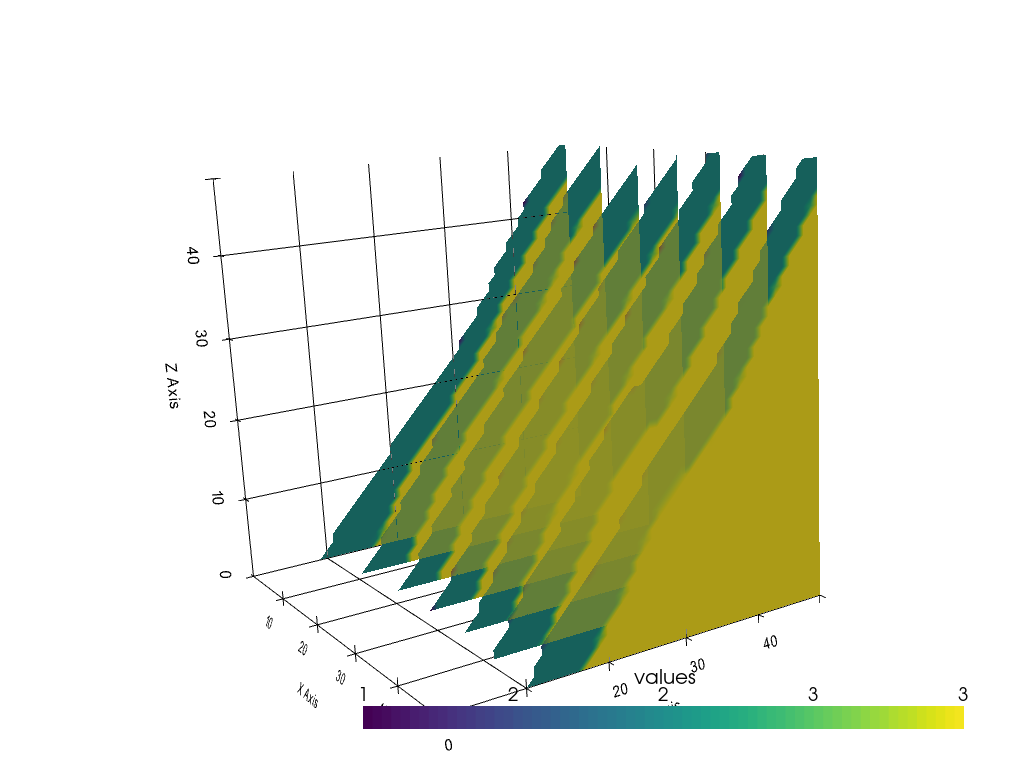

In [16]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)
p.camera_position = [(161.91360339500804, -56.76742646880152, 61.85062200360107), (24.5, 24.5, 24.5), (-0.16718411386271567, 0.1641218812347994, 0.9721694709112653)]

p.add_mesh(slices, scalar_bar_args=sargs, nan_opacity=0)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

In [17]:
slices = volume.slice_along_axis(n=7, axis="z")
slices

MultiBlock (0x275ea18ae20)
  N Blocks:	7
  X Bounds:	0.000, 49.000
  Y Bounds:	0.000, 49.000
  Z Bounds:	0.490, 48.510

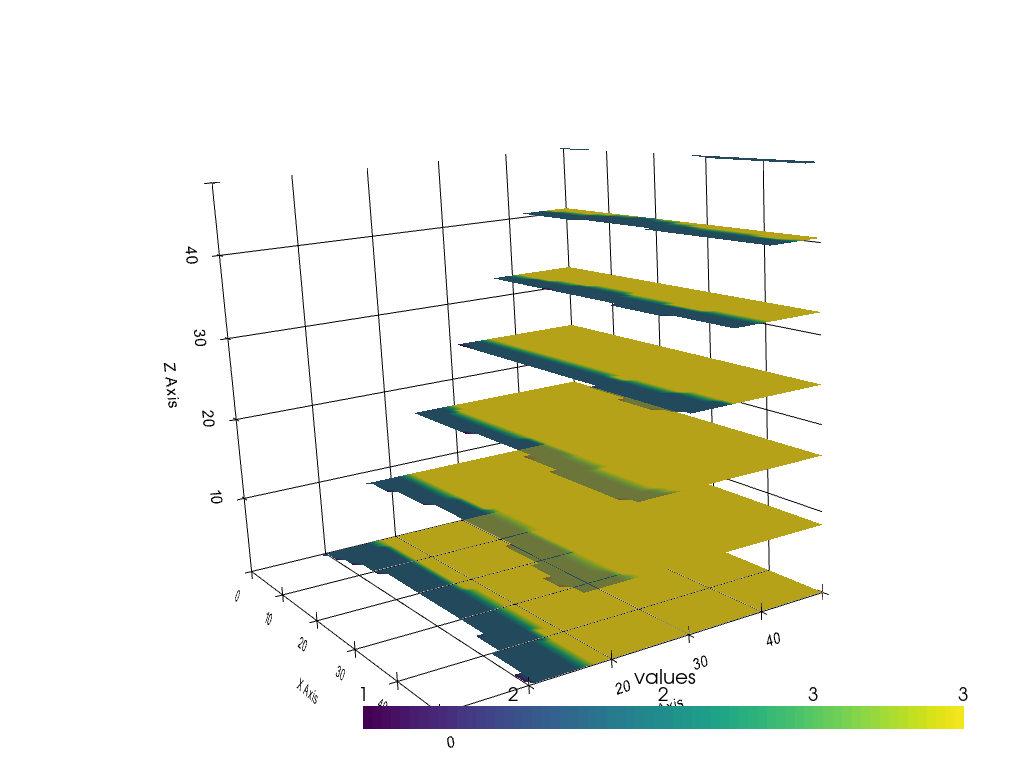

In [18]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)
p.camera_position = [(161.91360339500804, -56.76742646880152, 61.85062200360107), (24.5, 24.5, 24.5), (-0.16718411386271567, 0.1641218812347994, 0.9721694709112653)]

p.add_mesh(slices, scalar_bar_args=sargs, nan_opacity=0)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Cross section along a given LineString/Profile

A cross section can also be extracted along a predefined LineString, such as a Profile Line on the surface. 

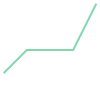

In [19]:
from shapely.geometry import LineString

linestring = LineString([(10,20,0), (20,30,0), (40,30,0), (50,50,0)])
linestring

In [20]:
np.asarray(linestring)

array([[10., 20.,  0.],
       [20., 30.,  0.],
       [40., 30.,  0.],
       [50., 50.,  0.]])

In [21]:
spline = pv.Spline(np.asarray(linestring),15)
spline

PolyData (0x275ea192ac0)
  N Cells:	1
  N Points:	15
  X Bounds:	1.000e+01, 5.000e+01
  Y Bounds:	2.000e+01, 5.000e+01
  Z Bounds:	0.000e+00, 0.000e+00
  N Arrays:	1

In [22]:
slice = volume.slice_along_line(spline)
slice

PolyData (0x275ee325d60)
  N Cells:	4459
  N Points:	4600
  X Bounds:	0.000e+00, 4.900e+01
  Y Bounds:	5.512e+00, 4.644e+01
  Z Bounds:	0.000e+00, 4.900e+01
  N Arrays:	1

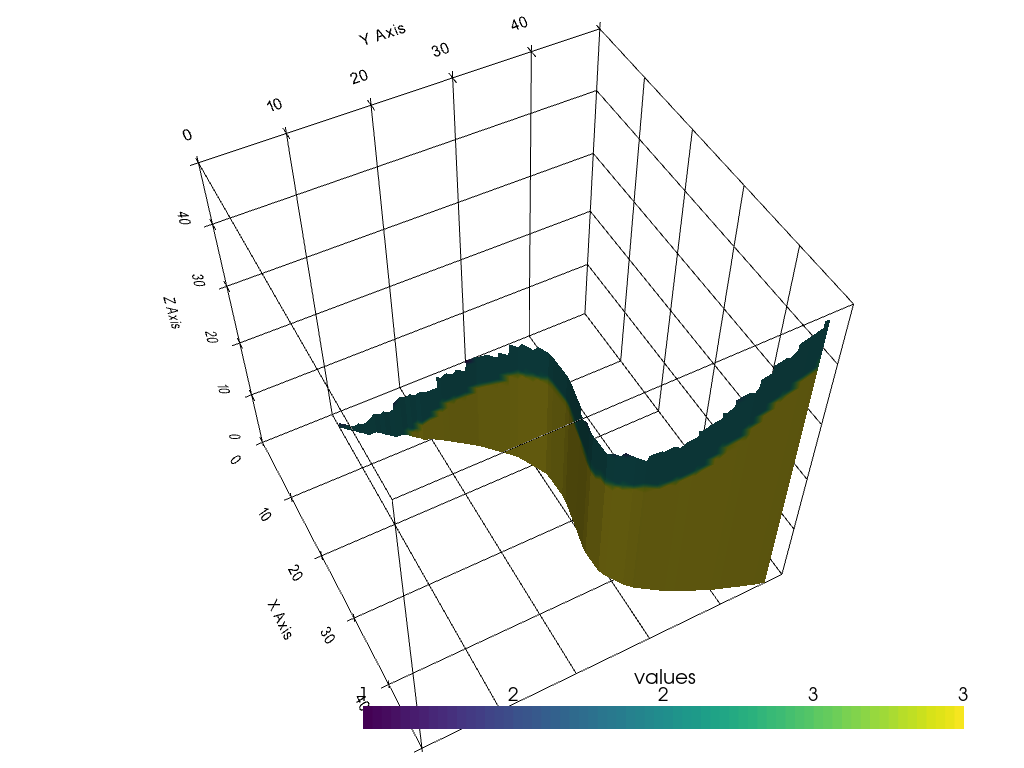

In [23]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)
p.camera_position = [(116.94895879808979, -23.54486636447751, 151.0971674252113), (24.5, 24.5, 24.5), (-0.6820986393942956, 0.36187292918718394, 0.6354442770675789)]
p.add_mesh(slice, scalar_bar_args=sargs, nan_opacity=0)

p.show_grid(color='black')
p.set_background(color='white')
p.add_mesh(volume.outline(), color="k")
p.show()

In [3]:
#not quite sure what you are trying to say with the do not interchange part below?  Don't change the cells as right, need to leave, do?


## Translating the volume and changing cell size

As the lith block was opened as a NumPy array, the spatial information of the location of the block and the size of each block was lost. By assigning new values to the ``origin`` and ``spacing`` attribute of the ``volume``, the volume can be translated to its real world coordinates and the cell size can be adjusted to fit the model cell sizes. Do not change the number of cells with size of each cell which is calculated by the length of each model dimension divided by the number of cells. The loaded volume was located at 0,0,0 and each cell had the dimension of 1,1,1. 

In [24]:
volume

UniformGrid (0x275e8d23ca0)
  N Cells:	117649
  N Points:	125000
  X Bounds:	0.000e+00, 4.900e+01
  Y Bounds:	0.000e+00, 4.900e+01
  Z Bounds:	0.000e+00, 4.900e+01
  Dimensions:	50, 50, 50
  Spacing:	1.000e+00, 1.000e+00, 1.000e+00
  N Arrays:	1

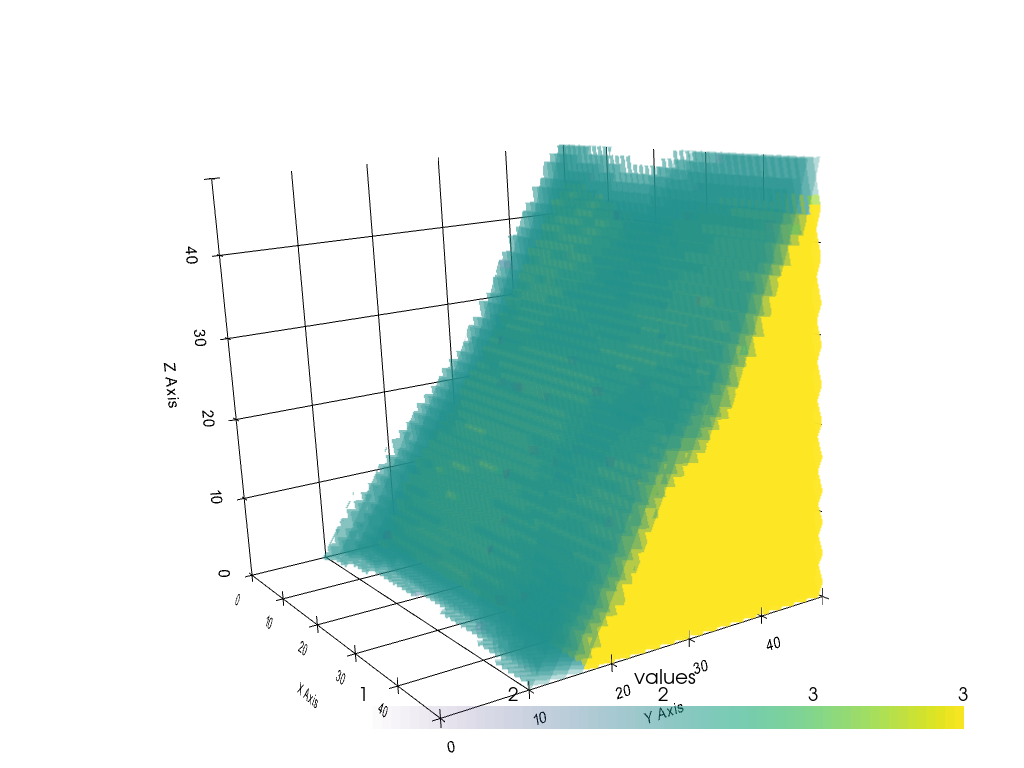

In [25]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)
p.camera_position = [(161.91360339500804, -56.76742646880152, 61.85062200360107), (24.5, 24.5, 24.5), (-0.16718411386271567, 0.1641218812347994, 0.9721694709112653)]

p.add_volume(volume, scalar_bar_args=sargs)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Changing the origin

In [26]:
volume.origin = [100,100,100]
volume.origin

[100.0, 100.0, 100.0]

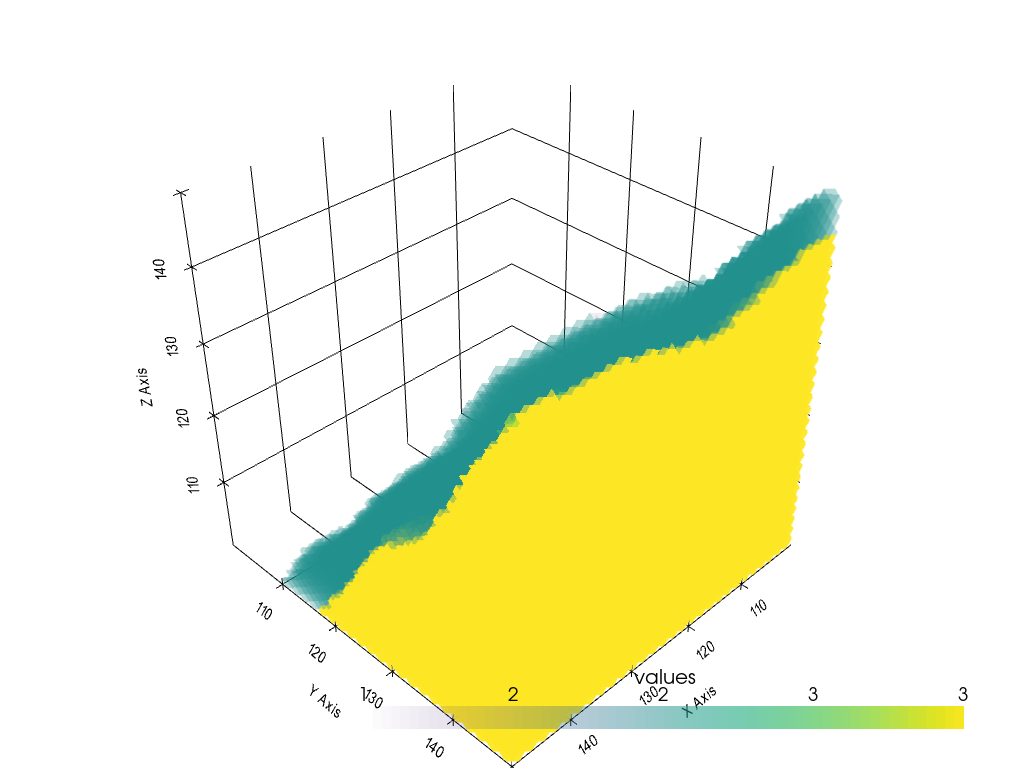

In [27]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_volume(volume, scalar_bar_args=sargs)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Changing the cell size

In [28]:
volume.spacing = [19, 21, 10]
volume.spacing 

[19.0, 21.0, 10.0]

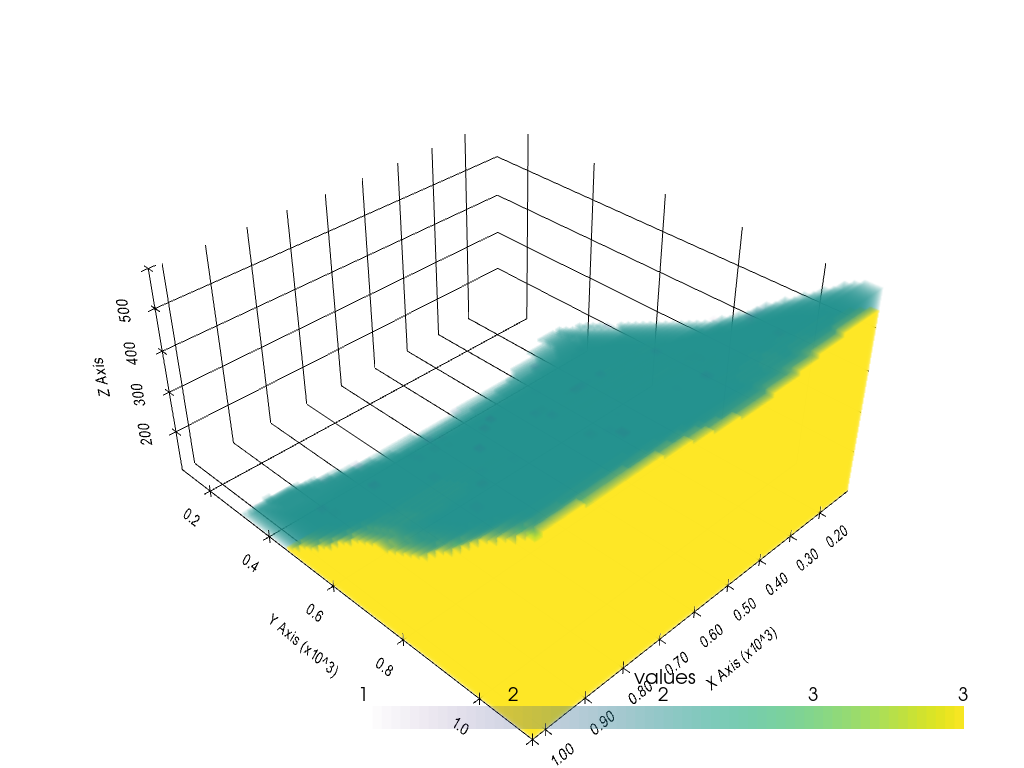

In [29]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_volume(volume, scalar_bar_args=sargs)

p.show_grid(color='black')
p.set_background(color='white')
p.show()